In [49]:
# invisible
lines = open("img_resolution.txt").readlines()
resolution = lines[0].strip()
if resolution != "default":
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = int(resolution)

<br>




## Matplotlib-Tutorial: Mehrfache Plots und Doppelachsen








<img width="40%" class="imgright" src="../images/multiple_plots.webp" srcset="../images/multiple_plots_700w.webp 700w,../images/multiple_plots_600w.webp 600w,../images/multiple_plots_500w.webp 500w,../images/multiple_plots_400w.webp 400w,../images/multiple_plots_350w.webp 350w,../images/multiple_plots_300w.webp 300w" alt="multiple plots" />
WEBOFF



In den bisherigen Kapiteln des Matplotlib-Tutorials haben wir in zahlreichen Beispiele gezeigt, wie wir Diagramme und Graphen erzeugen können. Ein häufig gestellte Frage ist, wie man mehrere Plots in einem Diagramm unterbringen kann.


Im einfachsten Fall heißt das, dass wir eine Kurve haben, und wir eine weitere Kurve darüber legen. Der interessantere Fall ist jedoch, wenn zwei Plots in einem Fenster gewünscht werden. In einem Fenster bedeutet, dass es zwei Unterdiagramme geben soll, d.h. dass diese nicht übereinander gezeichnet werden. Die Idee ist, mehr als einen Graphen in einem Fenster zu haben, und jeder Graph erscheint in seinem eigenen Unterdiagramm.

Wir stellen zwei verschiedene Wege vor, wie dies erreicht werden kann:




- ```subplot```
- ```gridspec```

Wir sind der Meinung, dass ```gridspec``` die beste Option ist, weil es einfacher in der Anwendung ist, wenn das Layout komplexer wird.

<br><br>

### Mehrere Abbildungen und Achsen

<br>

Die Funktion ```subplot``` hat folgende Parameter:

```subplot(nrows, ncols, plot_number)```

Wenn ein Unterdiagramm auf eine Abbildung angewendet wird, so wird die Abbildung theoretisch aufgeteilt in ```nrows * ncols``` Unterachsen. Der Parameter ```plot_number``` bezeichnet den Subplot, den der Funktionsaufruf erstellen muss. ```plot_number``` kann einen Wert zwischen 1 und dem Maximum von ```nrows * ncols``` annehmen.

Wenn der Wert der drei Parameter kleiner als 10 ist, kann die Funktion mit einem Integer Wert aufgerufen werden, wobei die Hunderter ```nrows```, die Zehner ```ncols``` und die Einheiten ```plot_number``` repräsentieren. Das bedeutet:
Statt ```subplot(2, 3, 4)``` kann ```subplot(234)``` geschrieben werden.

<br>
Im folgenden Beispiel "aktivieren" wir zwei Unterplots in einem "theoretischen" 2x2-Gitter:

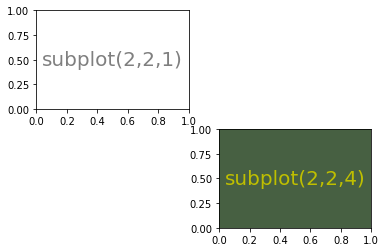

In [50]:
import matplotlib.pyplot as plt
python_course_green = "#476042"
plt.figure(figsize=(6, 4))
plt.subplot(221) # äquivalent zu: plt.subplot(2, 2, 1)
plt.text(0.5, # x-Koordinate, 0 ganz links, 1 ganz rechts
         0.5, # y-Koordinate, 0 ganz oben, 1 ganz unten
         'subplot(2,2,1)', # der Text der ausgegeben wird
         horizontalalignment='center', # abgekürzt 'ha' 
         verticalalignment='center', # abgekürzt 'va'
         fontsize=20, # kann auch  'font' genannt werden
         alpha=.5 # float (0.0 tranparent bis 1.0 undurchsichtig)
         )
plt.subplot(224, facecolor=python_course_green)
plt.text(0.5, 0.5, 
         'subplot(2,2,4)', 
         ha='center', va='center',
         fontsize=20, 
         color="y")
plt.show()

Für unsere Absichten benötigen wir keine Ticks auf den Achsen. Wir können sie loswerden, indem wir ein leeres Tupel setzen und folgenden Code ergänzen:

```
plt.xticks(())
plt.yticks(())
```

Das gesamte Programm sieht dann wie folgt aus:

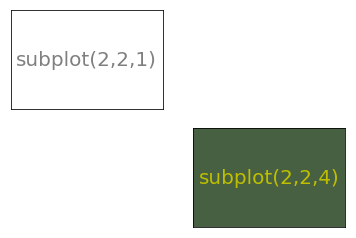

In [51]:
import matplotlib.pyplot as plt

python_course_green = "#476042"
# figsize werden wir erst später erklären:
plt.figure(figsize=(6, 4)) # Größe des Plots
plt.subplot(221) # öquivalent zu: plt.subplot(2, 2, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 
         0.5, 
         'subplot(2,2,1)', 
         horizontalalignment='center', 
         verticalalignment='center',
         fontsize=20, 
         alpha=.5 
         )
plt.subplot(224, facecolor=python_course_green)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 
         'subplot(2,2,4)', 
         ha='center', va='center',
         fontsize=20, 
         color="y")
plt.show()

Der vorige Ansatz ist durchaus akzeptabel. Jedoch ist es ein besserer  Stil, Instanzen der Figure-Klasse im Sinne der objektorientierten Programmierung zu verwenden. Wir demonstrieren dies, indem wir das vorige Beispiel umschreiben. In diesem Fall müssen wir die ```add_subplot```-Methode auf das Figure-Objekt anwenden.





Wir empfehlen dazu die Kapitel zu OOP in unserem Python-Tutorial zu lesen, wenn Sie nicht mit objektorientierter Programmierung vertraut sind:

<ul>
<li><a href="python3_object_oriented_programming.php">Allgemeine Einführung zur objektorientierten Programmierung (OOP)</a>
<li><a href="python3_class_and_instance_attributes.php">Klassen- und Instanz-Attribute</a>
<li><a href="python3_properties.php">Properties vs. Getters und Setters</a>
<li><a href="python3_inheritance.php">Vererbung</a>
<li><a href="python3_multiple_inheritance.php">Mehrfachvererbung</a>
<li><a href="python3_magic_methods.php">Magische Methoden und Opereator-Überladung</a>
</ul>


Die überarbeitete Version des Codes sieht wie folgt aus:

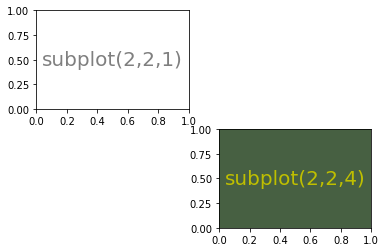

In [52]:
import matplotlib.pyplot as plt

python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))
sub1 = fig.add_subplot(221) # alternativ: plt.subplot(2, 2, 1)

sub1.text(0.5, # x-Koordinate: 0 ganz links, 1 ganz rechts 
          0.5, # y-Koordinate: 0 ganz oben, 1 ganz unten
          'subplot(2,2,1)', # der Text der ausgegeben wird
          horizontalalignment='center', # Abkürzung 'ha' 
          verticalalignment='center', # sAbkürzung 'va'
          fontsize=20, #  'font' ist äquivalent
          alpha=.5 # Floatzahl von 0.0 transparent bis 1.0 opak
          )
sub2 = fig.add_subplot(224, facecolor=python_course_green)
sub2.text(0.5, 0.5, 
          'subplot(2,2,4)', 
          ha='center', va='center',
          fontsize=20, 
          color="y")
plt.show()

Auch in diesem Fall wollen wir die Ticks wieder loswerden. Dieses Mal können wir nicht ```plt.xticks(())``` und ```plt.yticks(())``` benutzen. Wir müssen die Methoden ```set_xticks(())``` und ```set_yticks(())``` stattdessen benutzen.

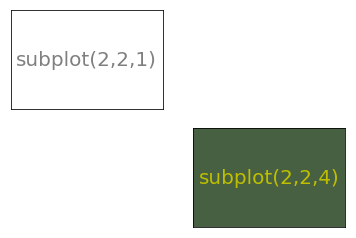

In [53]:
import matplotlib.pyplot as plt

python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))
sub1 = fig.add_subplot(221) # alternativ: plt.subplot(2, 2, 1)
sub1.set_xticks([]) 
sub1.set_yticks([]) 
sub1.text(0.5, # x-Koordinate: 0 ganz links, 1 ganz rechts
          0.5, # y-Koordinate: 0 ganz oben, 1 ganz unten
          'subplot(2,2,1)', # der Text der ausgegeben wird
          horizontalalignment='center', # Abkürzung 'ha' 
          verticalalignment='center', # sAbkürzung 'va'
          fontsize=20, #  'font' ist äquivalent
          alpha=.5 # Floatzahl von 0.0 transparent bis 1.0 opak
          )
sub2 = fig.add_subplot(224, facecolor=python_course_green)
sub2.set_xticks([])
sub2.set_yticks([]) 
sub2.text(0.5, 0.5, 
          'subplot(2,2,4)', 
          ha='center', va='center',
          fontsize=20, 
          color="y")
plt.show()

Wenn alle Unterplots des 2x2-Gitters aktiviert sind, sieht es wie folgt aus:

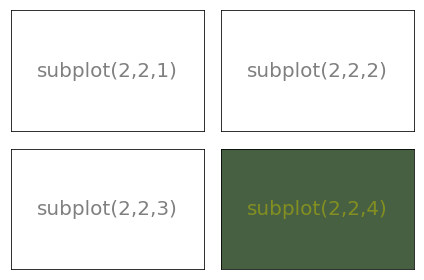

In [54]:
import matplotlib.pyplot as plt

python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))
sub1 = plt.subplot(2, 2, 1)
sub1.set_xticks(())
sub1.set_yticks(())
sub1.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
        size=20, alpha=.5)

sub2 = plt.subplot(2, 2, 2)
sub2.set_xticks(())
sub2.set_yticks(())
sub2.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
        size=20, alpha=.5)

sub3 = plt.subplot(2, 2, 3)
sub3.set_xticks(())
sub3.set_yticks(())
sub3.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
        size=20, alpha=.5)

sub4 = plt.subplot(2, 2, 4, facecolor=python_course_green)
sub4.set_xticks(())
sub4.set_yticks(())
sub4.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
        size=20, alpha=.5, color="y")

fig.tight_layout()
plt.show()

Das vorige Beispiel zeigt lediglich, wie man das Unterplot-Design erstellen kann. Normalerweise möchte man die subplot-Funktion benutzen, um mehrere Graphen darzustellen. Wir demonstrieren nun, wie man das vorige Unterplot-Design mit einigen Graphen füllt:

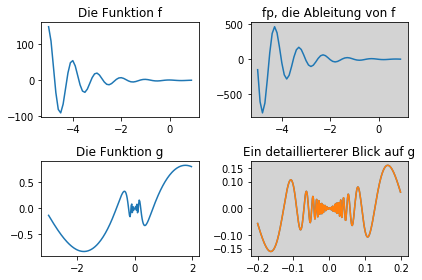

In [55]:
import numpy as np
from numpy import e, pi, sin, exp, cos
import matplotlib.pyplot as plt

def f(t):
    return exp(-t) * cos(2*pi*t)

def fp(t):
    return -2*pi * exp(-t) * sin(2*pi*t) - e**(-t)*cos(2*pi*t)

def g(t):
    return sin(t) * cos(1/(t+0.1))

def g(t):
    return sin(t) * cos(1/(t))


python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))

t = np.arange(-5.0, 1.0, 0.1)

sub1 = fig.add_subplot(221) # statt plt.subplot(2, 2, 1)
sub1.set_title('Die Funktion f') 
sub1.plot(t, f(t))


sub2 = fig.add_subplot(222, facecolor="lightgrey")
sub2.set_title('fp, die Ableitung von f')
sub2.plot(t, fp(t))


t = np.arange(-3.0, 2.0, 0.02)
sub3 = fig.add_subplot(223)
sub3.set_title('Die Funktion g')
sub3.plot(t, g(t))

t = np.arange(-0.2, 0.2, 0.001)
sub4 = fig.add_subplot(224, facecolor="lightgrey")
sub4.set_title('Ein detaillierterer Blick auf g')
sub4.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
sub4.set_yticks([-0.15, -0.1, 0, 0.1, 0.15])
sub4.plot(t, g(t))

plt.plot(t, g(t))

plt.tight_layout()
plt.show()



Weiteres Beispiel:

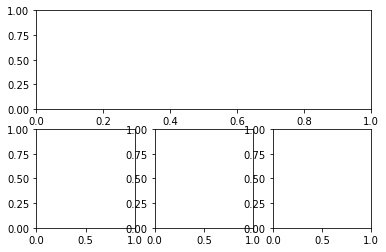

In [56]:
import  matplotlib.pyplot as plt

X = [ (2,1,1), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)




Das folgende Beispiel zeigt nichts Besonderes. Wir entfernen die ```xticks``` und experimentieren etwas mit der Größe der Abbildung und der Unterplots. Dafür führen wir nun den Schlüsselwort-Parameter ```figsize``` für "figure" ein. ```figsize``` erwartet ein Tupel mit einem Wert für Breite und  Höhe in Inches. Außerdem nutzen wir  die Funktion ```subplot_adjust``` mit deren Schlüsselwort-Parametern ```bottom```, ```left```, ```top``` und ```right```:

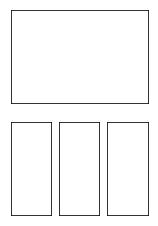

In [57]:
import  matplotlib.pyplot as plt

fig =plt.figure(figsize=(2, 3))
fig.subplots_adjust(bottom=0.025, 
                    left=0.025, 
                    top = 0.975, 
                    right=0.975)

X = [ (2,1,1), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    sub = fig.add_subplot(nrows, ncols, plot_number)
    sub.set_xticks([])
    sub.set_yticks([])



Alternative Lösung:

Um die ersten drei Elemente des 2x3-Gitters zu verbinden, können wir auch eine Tupel-Schreibweise verwenden. In unserem Fall (1,3) in (2,3,(1,3)), um festzulegen, dass die ersten drei Elemente des theoretischen 2x3-Gitters verbunden werden sollen:

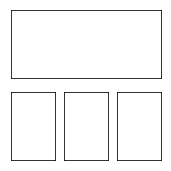

In [58]:
import  matplotlib.pyplot as plt

fig =plt.figure(figsize=(2.2, 2.2))
fig.subplots_adjust(bottom=0.025, 
                    left=0.025, 
                    top = 0.975, 
                    right=0.975)

X = [ (2,3,(1,3)), (2,3,4), (2,3,5), (2,3,6) ]
for nrows, ncols, plot_number in X:
    sub = fig.add_subplot(nrows, ncols, plot_number)
    sub.set_xticks([])
    sub.set_yticks([])

### Unterdiagramm mit gridspec



```matplotlib.gridspec``` beinhaltet die Klasse ```GridSpec```. Diese kann als Alternative zu subplot verwendet werden, um die Geometrie der Unterplots zu spezifizieren. Die Grund\-idee hinter GridSpec ist ein "Gitter", englisch "grid". Daher kommt auch der Name "gridspec". Ein Gitter wird erstellt, indem die Anzahl der benötigten Zeilen und Spalten angegeben wird. Anschließend definiert man innnerhalb des Gesamtgitters Unterbereiche oder Unterdiagramme (englisch "subplots").

Das folgende Beispiel zeigt den einfachsten Fall, d.h. ein 1x1-Gitter:

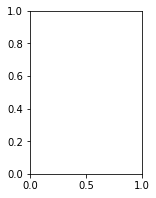

In [59]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(2, 3))
gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0,0])

plt.show()

Wir könnten noch einige der Parameter aus ```GridSpec``` benutzen, z.B. können wir definieren, dass der Graph erst 20% von unten und 15% von links der verfügbaren Abbildungsfläche beginnen soll:

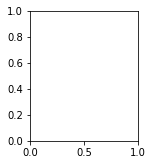

In [60]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(2, 3))
gs = GridSpec(1, 1, 
              bottom=0.2,
              left=0.15,
              top=0.8)
ax = fig.add_subplot(gs[0,0])

plt.show()

Das nächste Beispiel zeigt ein komplexeres Beispiel mit einem aufwendigeren Gitter-Design:

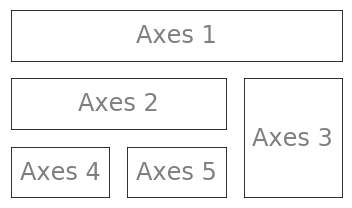

In [61]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as pl

pl.figure(figsize=(5,3))
G = gridspec.GridSpec(3, 3)

axes_1 = pl.subplot(G[0, :])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'Axes 1', ha='center', 
        va='center', size=24, alpha=.5)

axes_2 = pl.subplot(G[1, :-1])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'Axes 2', ha='center', 
        va='center', size=24, alpha=.5)

axes_3 = pl.subplot(G[1:, -1])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'Axes 3', ha='center', 
        va='center', size=24, alpha=.5)

axes_4 = pl.subplot(G[-1, 0])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'Axes 4', ha='center', 
        va='center', size=24, alpha=.5)

axes_5 = pl.subplot(G[-1, -2])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'Axes 5', ha='center', 
        va='center', size=24, alpha=.5)

pl.tight_layout()
pl.show()

Die Gitter-Spezifikation aus dem vorigen Beispiel verwenden wir nun, um sie mit Funktionsgraphen zu bestücken:

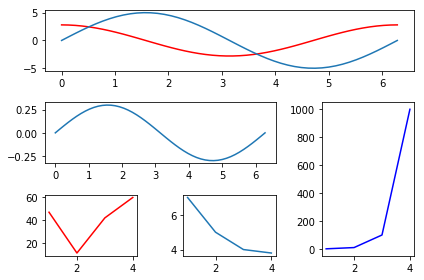

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3)

X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 2.8 * np.cos(X)
F2 = 5 * np.sin(X)
F3 = 0.3 * np.sin(X)

axes_1 = plt.subplot(G[0, :])
axes_1.plot(X, F1, 'r-', X, F2)

axes_2 = plt.subplot(G[1, :-1])
axes_2.plot(X, F3)

axes_3 = plt.subplot(G[1:, -1])
axes_3.plot([1,2,3,4], [1,10,100,1000], 'b-')

axes_4 = plt.subplot(G[-1, 0])
axes_4.plot([1,2,3,4], [47, 11, 42, 60], 'r-')

axes_5 = plt.subplot(G[-1, -2])
axes_5.plot([1,2,3,4], [7, 5, 4, 3.8])

plt.tight_layout()
plt.show()

<br><br>

### Arbeiten mit Objekten

Matplotlib ist komplett objektorientiert designt und programmiert -- wie Python selbst. Die bis jetzt gezeigten Beispiel waren sehr einfach. Um die Beispiele so einfach wie möglich zu halten, arbeiteten wir z.B. nicht immer mit figure-Objekten. Trotzdem werden die Objekte automatisch angelegt. Der Vorteil der Verwendung von Objekten kommt dann zum Vorschein, wenn mehr als eine Abbildung verwendet wird, oder wenn eine Abbildung mehrere Unterdiagramme (subplots) enthält.


Im folgenden Beispiel erstellen wir einen Plot auf eine streng objektorientierte Art und Weise. Wir beginnen mit der Erstellung eines neuen figure-Objektes. Wir speichern dazu eine Referenz in der Variable ```fig```. Diese benutzen wir, um mit ```add_axes``` aus der figure-Klasse neue axis-Instanzen zu erstellen:

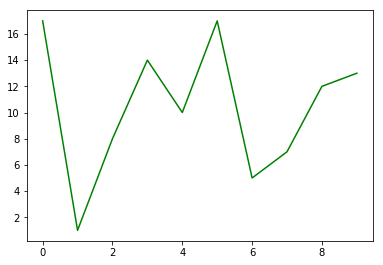

In [63]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

X = np.arange(0,10)
Y = np.random.randint(1,20, size=10)

left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
axes = fig.add_axes([left, bottom, width, height])

axes.plot(X, Y, 'g')

plt.show(fig)

Ohne explizite Instanzen zu verwenden, sieht der Code folgendermaßen aus:

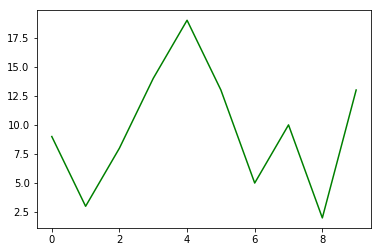

In [64]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0,10)
Y = np.random.randint(1,20, size=10)

plt.plot(X, Y, 'g')

plt.show()


### Ein Plot innerhalb eines anderen Plots

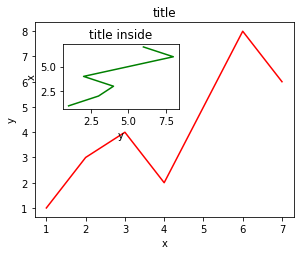

In [65]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 3))

X = [1, 2, 3, 4, 5, 6, 7]
Y = [1, 3, 4, 2, 5, 8, 6]

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.2, 0.6, 0.4, 0.3]) # inset axes

# main figure
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

axes1.plot(X, Y, 'r')


# insert
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('title inside')
axes2.plot(Y, X, 'g')

plt.show()

<br><br>

### Setzen des Plotbereichs



Es gibt die Möglichkeit, den Bereich der Achsen zu konfigurieren. Dafür verwendet man die Methoden ```set_ylim``` und ```set_xlim``` des Achsen-Objektes. Mit ```axis('tight')``` erstellen wir automatisch "eng anliegende" Plot-Bereiche:

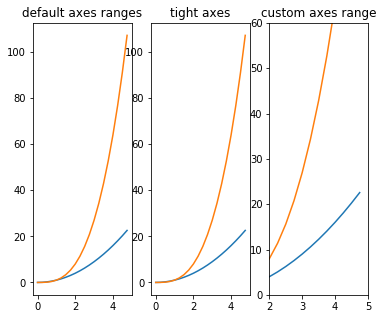

In [66]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(6, 5))

x = np.arange(0, 5, 0.25)

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");


<br><br>

### Logarithmische Darstellung





Es gibt auch die Möglichkeit, eine logarithmische Darstellung für eine oder beide Achsen einzustellen. Die Funktionalität ist tatsächlich nur eine einzige Applikation eines allgemeineren Transformations-Systems in Matpltolib. Jede der Achsen-Darstellung wird durch eine separate ```set_xscale```- und ```set_yscale```-Methode gesetzt. Diese nehmen einen Parameter entgegen (in diesem Fall mit dem Wert "log"):

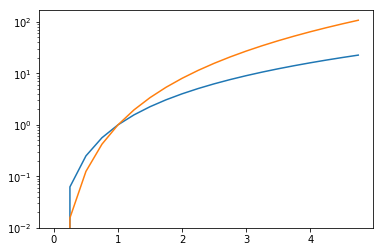

In [67]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(0, 5, 0.25)

ax.plot(x, x**2, x, x**3)


ax.set_yscale("log")

plt.show()

<br><br>

### Sekundäre Y-Achse



Bisher haben wir schon öfters zwei verschiedene Graphen in einem Plot dargestellt. Allerdings war bisher immer der Wertebereich, also die Einheit auf der y-Achse, die gleiche gewesen. Im Folgenden haben wir zwei Wertebereiche, einmal "cm" und einmal "qcm". Wir erzeugen die zweite y-Achse, die man üblicherweise als Sekundärachse bezeichnet, mit der Methode ```twinx```:

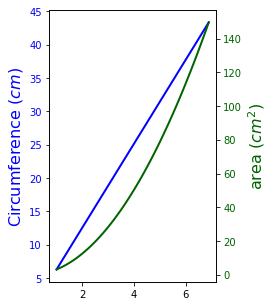

In [68]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(3, 5))

x = np.arange(1,7,0.1)
ax1.plot(x, 2 * np.pi * x, lw=2, color="blue")
ax1.set_ylabel(r"Circumference $(cm)$", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, np.pi * x ** 2, lw=2, color="darkgreen")
ax2.set_ylabel(r"area $(cm^2)$", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")



Die folgenden Themen stehen nicht im direkten Zusammenhang mit Unterplots. Trotzdem wollen wir sie hier erwähnen, um die Einführung der Basis-Möglichkeiten von Matplotlib abzurunden. Das erste zeigt, wie Gitter-Linien definiert werden. Das zweite, sehr wichtige Thema, befasst sich mit der Speicherung von Plots in Bild-Dateien.

<br><br>

### Gitter-Linien



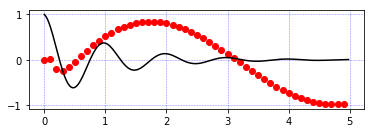

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.sin(t) * np.cos(1/(t+0.1))

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.subplot(212)
plt.plot(t1, g(t1), 'ro', t2, f(t2), 'k')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

<br><br>

### Abbildungen speichern




Die savefig-Methode kann verwendet werden, um Abbildungen als Dateien zu speichern:

```fig.savefig('filename.png')```

Optional kann die DPI und das Ausgabeformat festgelegt werden:

```fig.savefig('filename.png', dpi=200)```

Die gängigen Bildformate sind als Ausgabe von savefig möglich: PNG, JPG, EPS, SVG, PGF und PDF. 

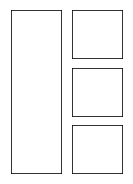

In [70]:
# prog4book

import  matplotlib.pyplot as plt
fig =plt.figure(figsize=(2, 3))
X = [ (1,2,1), (3,2,2), (3,2,4), (3,2,6) ]
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

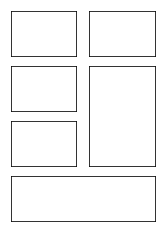

In [71]:
# prog4book
import  matplotlib.pyplot as plt
fig =plt.figure(figsize=(2, 3))
X = [  (4,2,1),(4,2,2), (4,2,3), (4,2,5), (4,2,(4,6)), (4,1,4)]
plt.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

plt.show()

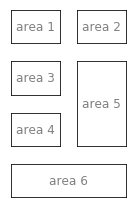

In [72]:
# prog4book

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as pl

pl.figure(figsize=(2, 3))
G = gridspec.GridSpec(4, 2)

fontsize = 12
alpha = 0.5
axes_1 = pl.subplot(G[0, 0])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 1', ha='center', 
        va='center', size=fontsize, alpha=alpha)

axes_2 = pl.subplot(G[0, 1])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 2', ha='center', 
        va='center', size=fontsize, alpha=alpha)

axes_3 = pl.subplot(G[1, 0])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 3', ha='center', 
        va='center', size=fontsize, alpha=alpha)

axes_4 = pl.subplot(G[2, 0])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 4', ha='center', 
        va='center', size=fontsize, alpha=alpha)

axes_5 = pl.subplot(G[1:3, 1])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 5', ha='center', 
        va='center', size=fontsize, alpha=alpha)

axes_6 = pl.subplot(G[3, :])
pl.xticks(())
pl.yticks(())
pl.text(0.5, 0.5, 'area 6', ha='center', 
        va='center', size=fontsize, alpha=alpha)

pl.tight_layout()
pl.show()